1.What is Simple Linear Regression?
 - It is a supervised Machine learning algorithm
 - Simple Linear Regression is a statistical method used to model the relationship between two quantitative variables by fitting a straight line to observed data. One variable acts as the predictor (independent variable), and the other as the response (dependent variable).
 - Model is expressed as y=mx+c
where y is dependent variable,
x is independent variable
m is slope
c is intercept
- uses:
   - Prediction: Estimate the value of Y for a given X.
    - Measure how strongly two variables are related.
    - Identify patterns in data using a straight-line fit.





  

2.What are the key assumptions of Simple Linear Regression?
  - For simple linear regression to be valid, several assumptions must hold:
   - Linearity: The relationship between X and Y is linear.
   - Independence: Observations are independent of each other.
   - Homoscedasticity: Constant variance of errors across values of X.
   - Normality of residuals: Errors are normally distributed

3.What is heteroscedasticity, and why is it important to address in regression
models?
- Heteroscedasticity refers to the situation in regression analysis where the variance of the error terms (residuals) is not constant across all levels of the independent variables.
- It is important to handle because of
  - Biased Standard Errors: Ordinary Least Squares (OLS) regression assumes constant variance. If heteroscedasticity exists, the estimated standard errors are incorrect.
  - Invalid Hypothesis Tests: Because standard errors are biased, t-tests and F-tests may give misleading results (e.g., falsely significant or insignificant predictors).
  - Unreliable Confidence Intervals: Confidence intervals for coefficients may be too narrow or too wide, reducing trust in predictions.
  - Prediction Issues: While coefficient estimates remain unbiased, predictions become less precise when variance is unequal.


4.What is Multiple Linear Regression?

- Multiple Linear Regression (MLR) is a statistical technique used to model the relationship between one dependent variable and two or more independent variables. It extends simple linear regression by allowing multiple predictors to predict the outcome
- Like simple regression, MLR relies on assumptions:
  - Linearity: Relationship between predictors and outcome is linear.
  - Independence: Observations are independent.
  - Homoscedasticity: Constant variance of residuals.
  - Normality: Residuals are normally distributed.
  - No multicollinearity: Predictors should not be highly correlated with each other.

- uses
  - More realistic models: Real-world outcomes usually depend on multiple factors.
  - Better predictions: Incorporating several predictors improves accuracy.
  - Insight into relationships: Shows which variables matter most and how they interact



5.What is polynomial regression, and how does it differ from linear
regression?
- Polynomial regression is a type of regression analysis where the relationship between the independent variable x and the dependent variable y is modeled as an nth-degree polynomial.
Instead of fitting a straight line, it fits a curve to the data.
polynomial regression is used when the data shows a non-linear relationship, and it can capture more complex patterns than simple linear regression.
- on the other hand Linear regression assumes that the relationship between the input variable and the output is a straight line.
- So the core difference is in the shape of the relationship each model can capture. Linear regression is limited to straight lines, while polynomial regression can model curves of varying complexity. Because of this, polynomial regression is more flexible, but that flexibility also means it can overfit if the degree of the polynomial is too high


/tmp/ipython-input-4159819117.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


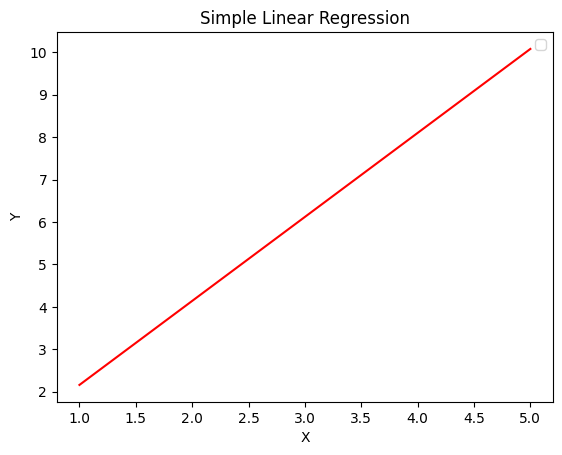

Slope (Coefficient): 1.9800000000000004
Intercept: 0.17999999999999794


In [8]:
'''
6.Implement a Python program to fit a Simple Linear Regression model to
the following sample data:
● X = [1, 2, 3, 4, 5]
● Y = [2.1, 4.3, 6.1, 7.9, 10.2]
Plot the regression line over the data points'''

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # Reshape for sklearn
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)

plt.plot(X, Y_pred, color='red')


plt.xlabel("X")
plt.ylabel("Y")
plt.title("Simple Linear Regression")
plt.legend()

plt.show()

print("Slope (Coefficient):", model.coef_[0])
print("Intercept:", model.intercept_)


In [9]:
'''
7.Fit a Multiple Linear Regression model on this sample data:
● Area = [1200, 1500, 1800, 2000]
● Rooms = [2, 3, 3, 4]
● Price = [250000, 300000, 320000, 370000]
Check for multicollinearity using VIF and report the results
'''
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

Area = [1200, 1500, 1800, 2000]
Rooms = [2, 3, 3, 4]
Price = [250000, 300000, 320000, 370000]

df = pd.DataFrame({
    'Area': Area,
    'Rooms': Rooms,
    'Price': Price
})


X = df[['Area', 'Rooms']]
y = df['Price']

model = LinearRegression()
model.fit(X, y)

print("Regression Coefficients:")
print("Area Coefficient:", model.coef_[0])
print("Rooms Coefficient:", model.coef_[1])
print("Intercept:", model.intercept_)


X_with_const = np.append(arr=np.ones((X.shape[0], 1)), values=X, axis=1)

vif_data = pd.DataFrame()
vif_data["Feature"] = ["Intercept", "Area", "Rooms"]
vif_data["VIF"] = [variance_inflation_factor(X_with_const, i) for i in range(X_with_const.shape[1])]

print("\nVariance Inflation Factor (VIF):")
print(vif_data)

Regression Coefficients:
Area Coefficient: 63.15789473684211
Rooms Coefficient: 34736.842105263146
Intercept: 103157.89473684214

Variance Inflation Factor (VIF):
     Feature        VIF
0  Intercept  34.210526
1       Area   7.736842
2      Rooms   7.736842


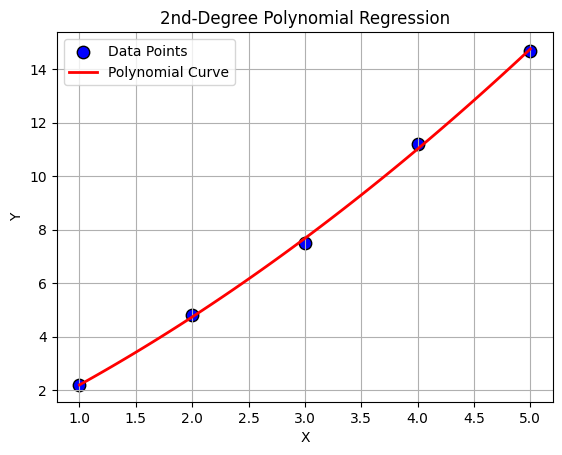

In [10]:
'''
8.Implement polynomial regression on the following data:
X = [1, 2, 3, 4, 5]
Y = [2.2, 4.8, 7.5, 11.2, 14.7]
Fit a 2nd-degree polynomial and plot the resulting curve'''

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])


poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, Y)

X_curve = np.linspace(1, 5, 100).reshape(-1, 1)
X_curve_poly = poly.transform(X_curve)
Y_curve = model.predict(X_curve_poly)


plt.scatter(X, Y, color='blue', s=80, edgecolor='black', label='Data Points')
plt.plot(X_curve, Y_curve, color='red', linewidth=2, label='Polynomial Curve')

plt.xlabel("X")
plt.ylabel("Y")
plt.title("2nd-Degree Polynomial Regression")
plt.legend()
plt.grid(True)
plt.show()



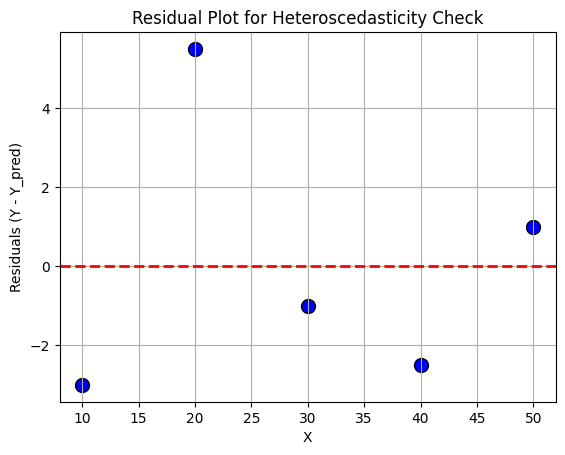

In [11]:
'''
9.Create a residuals plot for a regression model trained on this data:
● X = [10, 20, 30, 40, 50]
● Y = [15, 35, 40, 50, 65]
Assess heteroscedasticity by examining the spread of residuals
'''
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])


model = LinearRegression()
model.fit(X, Y)

Y_pred = model.predict(X)
residuals = Y - Y_pred


plt.scatter(X, residuals, color='blue', s=100, edgecolor='black')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)

plt.xlabel("X")
plt.ylabel("Residuals (Y - Y_pred)")
plt.title("Residual Plot for Heteroscedasticity Check")
plt.grid(True)
plt.show()

 10.Imagine you are a data scientist working for a real estate company. You
need to predict house prices using features like area, number of rooms, and location.
However, you detect heteroscedasticity and multicollinearity in your regression
model. Explain the steps you would take to address these issues and ensure a robust
model.


- As a data scientist building a house‑price prediction model, I would start by diagnosing the issues of multicollinearity and heteroscedasticity using tools like correlation matrices, VIF scores, and residual plots. If multicollinearity is present—for example, when area and number of rooms strongly overlap—I would reduce it by removing one of the correlated features, combining them into a more meaningful variable, or switching to regularized models such as Ridge or Lasso that naturally stabilize correlated predictors. If many features are correlated, I might also use dimensionality-reduction techniques like PCA to create uncorrelated components. To address heteroscedasticity, I would examine residual plots and apply transformations such as log or square-root scaling to the target variable or certain predictors to stabilize variance. If the issue persists, I would use Weighted Least Squares or robust regression methods that are designed to handle non-constant variance. After applying these corrections, I would retrain the model, re-evaluate residuals and VIF values, and ensure that the assumptions of linear regression are now reasonably satisfied. Finally, I would validate the improved model using cross‑validation to confirm that it generalizes well and provides reliable predictions for real‑estate pricing.